# Types of Unsupervised Learning
There are two main types: transformationsof the dataset and clustering.
## ✅ 1. **Unsupervised Transformation (数据集变换)**

> *Creating a new representation of data that may be easier for humans or other ML algorithms to understand.*

### ➤ Common Application: **Dimensionality Reduction (降维)**

- Takes high-dimensional data (e.g., 100 features) → reduces it to fewer dimensions (e.g., 2D or 3D).
- Goal: Keep important structure while removing noise/redundancy.
- Example: Visualizing customer segments in 2D instead of 50D.

### ➤ Another Application: **Topic Extraction (主题提取)**
- Used in text analysis.
- Finds hidden themes in documents (e.g., “election”, “guns”, “music”).
- Useful for tracking social media trends.
  
## ✅ 2. **Clustering Algorithms (聚类算法)**

> *Divide data into groups where items within each group are similar.*

### ➤ Real-World Example: Photo Organization

Imagine uploading photos to a social media site:

- The system doesn’t know who is in each photo.
- But it can extract faces → group similar-looking faces together → assume they belong to the same person.

➡️ That’s clustering!

> 💡 Clustering finds structure **without being told what the groups should be**.

---

# ⚠️Challenges of Unsupervised Learning

> “The main challenge is evaluating whether the algorithm learned something useful.”

Unlike supervised learning (where you have true labels to measure accuracy), here:

- ❗ There’s **no ground truth**.
- ❗ You can’t say “this model is 95% correct.”
- ❗ Evaluation often requires **human inspection**.

## So… When Should You Use It?

✅ For **exploratory analysis** — to understand your data better.

✅ As a **preprocessing step** for supervised learning:

- Reduce dimensionality → faster training
- Remove noise → improve model performance
- Create new features → boost accuracy

> 🎯 Think of unsupervised learning as a **data detective** — helping you discover what’s hiding inside your dataset.

# Preprocessing & Scaling

> “Some algorithms (like Neural Networks and SVM) are very sensitive to feature scaling.”

So before feeding data into these models, we usually **scale or transform** features to make them more suitable.

Let’s look at Figure 3-1 — which shows 5 different preprocessing methods applied to the same 2D dataset.
## Different ways to rescale and preprocess a dataset

In [105]:
%matplotlib inline
from preamble import *
plt.rcParams['image.cmap'] = "gray"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
from sklearn.datasets import make_blobs
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

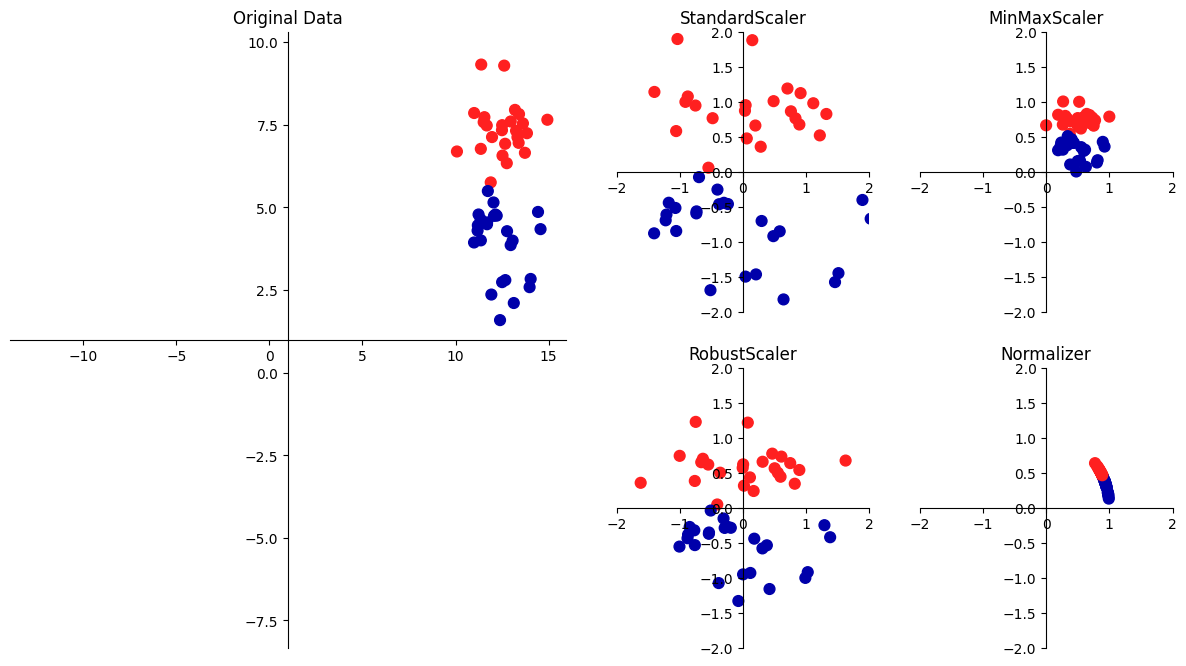

In [106]:
mglearn.plots.plot_scaling()

##  Different Kinds of Preprocessing
 The first plot in Figure 3-1 shows a synthetic two-class classification dataset with twofeatures. 
 
The first feature (the x-axis value) is between 10 and 15. The second feature (the y-axis value) is between around 1 and 9.

--------

The following four plots show four different ways to transform the data that yield
 more standard ranges. 

 
| Plot | Method | What It Does |
| --- | --- | --- |
| Original Data | — | Raw data — x-axis: ~10–15, y-axis: ~1–9 |
| StandardScaler | Z-score scaling | Mean = 0, Std = 1 → all features on same scale |
| MinMaxScaler | Range scaling | Scales to \[0, 1\] → min becomes 0, max becomes 1 |
| RobustScaler | Median-based | Uses median & IQR → ignores outliers |
| Normalizer | Length normalization | Makes each point have unit length → good when direction matters, not size |

------


**RobustScaler**
However, the RobustScaler uses the median and **quartiles**（四分位数）, instead of mean and variance. 

This makes the RobustScaler ignore data points that are verydifferent from the rest (like measurement errors). 

These odd data points are also called **outliers**（异常值）, and can lead to trouble for other scaling techniques.

----------

**Normalizer**
the Normalizer does a very different kind of rescaling. 

It scales each datapoint such that the feature vector has a Euclidean length(欧式长度) of 1. In other words, itprojects a data point on the circle (or sphere, in the case of higher dimensions) with aradius of 1. 

This means every data point is scaled by **a different number** (by theinverse of its length). 

This normalization is often used when ***only the direction (orangle) of the data matters, not the length of the feature vector***

## Apply on the cancer dataset
Preprocessing methods like the scalers are usually applied before applying a supervised
 machine learning algorithm. 

As an example, say we want to apply the kernel SVM
 (SVC) to the cancer dataset, and use MinMaxScaler for preprocessing the data.

### load the data and split it
We start by loading our dataset and splitting it into a training set and a test set (we need
 separate training and test sets to evaluate the supervised model we will build after the
 preprocessing):

In [107]:
 from sklearn.datasets import load_breast_cancer
 from sklearn.model_selection import train_test_split
 cancer = load_breast_cancer()
 X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
 random_state=1)
 print(X_train.shape)
 print(X_test.shape)

(426, 30)
(143, 30)


 As a reminder, the dataset contains 569 data points, each represented by 30 measure
ments. We split the dataset into 426 samples for the training set and 143 samples for
 the test set.
 
### instantiate the scaler
As with the supervised models we built earlier, we first import the class that imple
ments the preprocessing, and then instantiate it(实例化):

In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

### fit the scaler on training data only
We then fit the scaler using the fit method, applied to the training data. 

For the MinMaxScaler, the fit method computes the minimum and maximum value of each fea
ture on the training set. 

In contrast to the classifiers and regressors of Chapter 2, the scaler is only provided with the data (X_train) when fit is called, and y_train is not
 used:

In [109]:
scaler.fit(X_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


### transform it
 To apply the transformation that we just learned—that is, to actually scale the training
 data—we use the transform method of the scaler. 
     
The transform method is used in scikit-learn whenever a model returns a new representation of the data:

In [110]:
 # transform data
X_train_scaled = scaler.transform(X_train)
 # print dataset properties before and after scaling
np.set_printoptions(suppress=True, precision=4) # 删去这个就是科学计数法的表现形式
print("transformed shape: {}".format(X_train_scaled.shape))

print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))

print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
 
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))

print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [  6.981    9.71    43.79   143.5      0.0526   0.0194   0.       0.
   0.106    0.0502   0.1153   0.3602   0.757    6.802    0.0017   0.0023
   0.       0.       0.0095   0.0009   7.93    12.02    50.41   185.2
   0.0712   0.0273   0.       0.       0.1566   0.0552]
per-feature maximum before scaling:
 [  28.11     39.28    188.5    2501.        0.1634    0.2867    0.4268
    0.2012    0.304     0.0958    2.873     4.885    21.98    542.2
    0.0311    0.1354    0.396     0.0528    0.0615    0.0298   36.04
   49.54    251.2    4254.        0.2226    0.9379    1.17      0.291
    0.5774    0.1486]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


#### scientific notation explain
6.981e+00  6.981

5.263e-02  0.05263

e+n = multiply by 10^n

e-n = divide by 10^n 

**how to turn on/off**

```python
import numpy as np

np.set_printoptions(suppress=True, precision=4)
```
✅ `suppress=True` → hides scientific notation  
✅ `precision=4` → shows 4 decimal places



The transformed data has the same shape as the original data—the features are simply
 shifted and scaled. 
 
 You can see that all of the features are now between 0 and 1, as
 desired.

 ### transform the test set
 
 To apply the SVM to the scaled data, we also need to transform the test set. This is
 again done by calling the transform method, this time on X_test:

In [111]:
 # transform test data
 X_test_scaled = scaler.transform(X_test)
 # print test data properties after scaling
 print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
 print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336  0.0227  0.0314  0.0114  0.1413  0.0441  0.      0.      0.154
 -0.0062 -0.0014  0.0059  0.0043  0.0008  0.0392  0.0112  0.      0.
 -0.0319  0.0066  0.0266  0.0581  0.0203  0.0094  0.1094  0.0264  0.
  0.     -0.0002 -0.0018]
per-feature maximum after scaling:
[0.9579 0.815  0.9558 0.8935 0.8113 1.2196 0.8796 0.9334 0.9323 1.0371
 0.4267 0.4977 0.4412 0.2837 0.487  0.7386 0.7672 0.6293 1.3369 0.3906
 0.8961 0.7932 0.8486 0.7449 0.9155 1.1319 1.0701 0.9237 1.2053 1.6307]


#### **Why Test Set Min/Max ≠ 0 and 1**
Maybe somewhat surprisingly, you can see that for the test set, after scaling, the mini
mum and maximum are not 0 and 1. 

Some of the features are **even outside the 0–1 range**! 

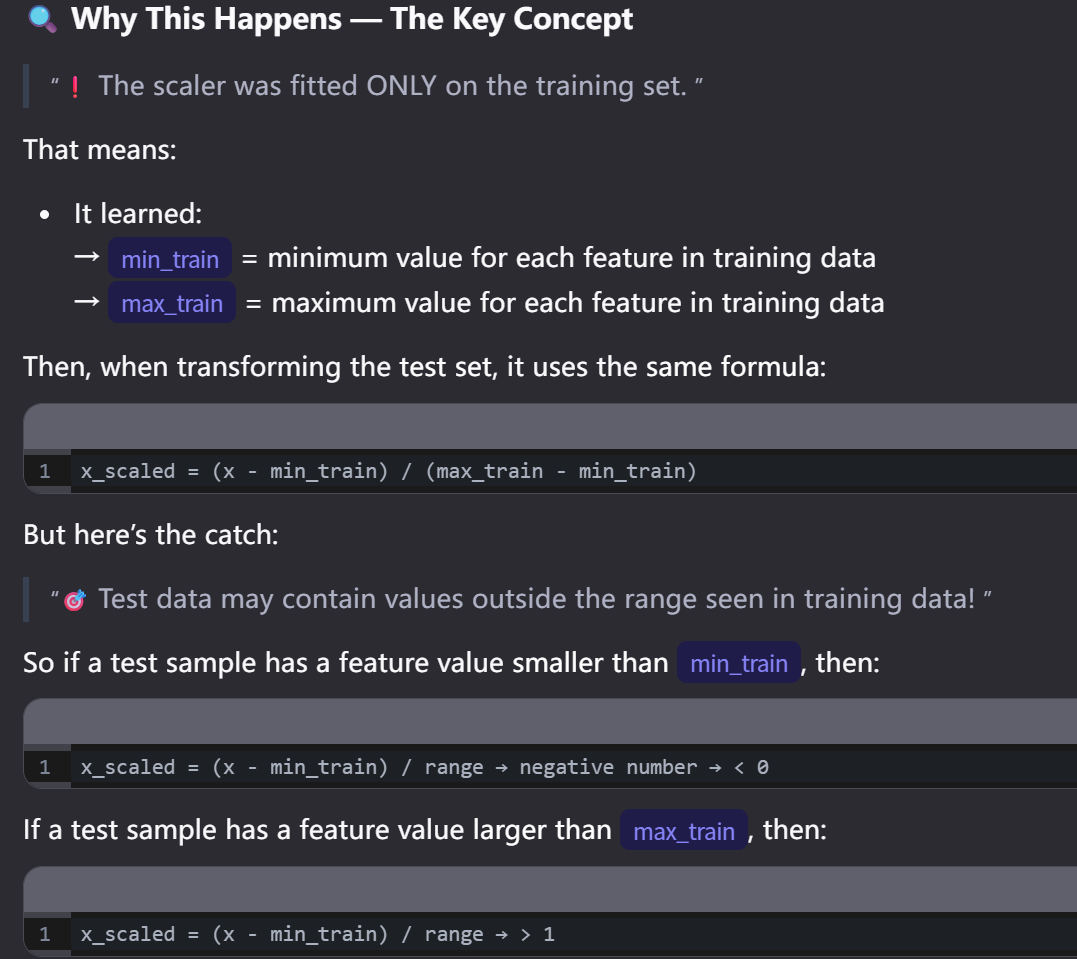

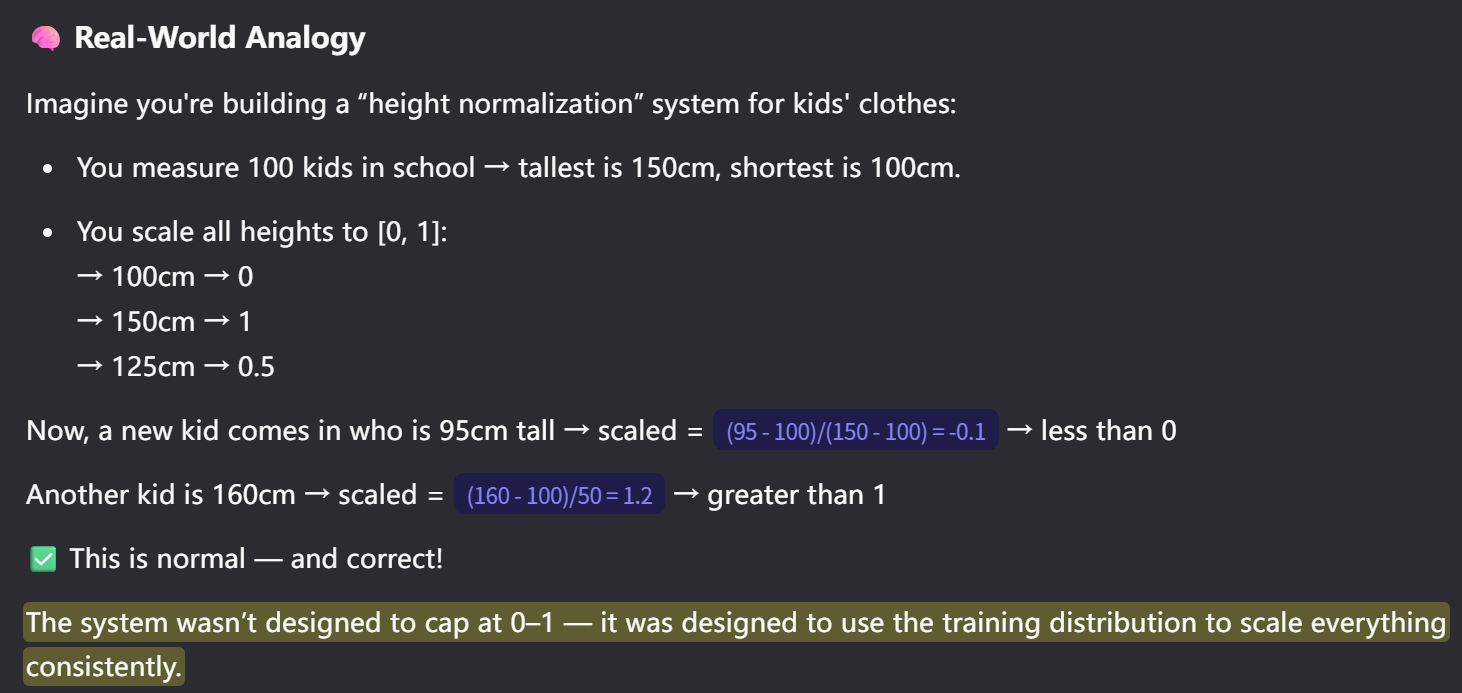

The explanation is that the MinMaxScaler (and all the other scalers) always
applies exactly the same transformation to the training and the test set. 
    
This means the transform method always **subtracts the training set minimum and divides by the
 training set range**, which might be different from the minimum and range for the test
 set

## Scaling Training and Test Data the Same Way

 It is important to apply exactly the same transformation to the training set and the
 test set for the supervised model to work on the test set. The following example
 (Figure 3-2) illustrates what would happen if we were to use the minimum and range
 of the test set instead:

C:\Users\22483\AppData\Local\Temp\ipykernel_15888\1511130193.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[0].scatter(X_train[:, 0], X_train[:, 1],
C:\Users\22483\AppData\Local\Temp\ipykernel_15888\1511130193.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
C:\Users\22483\AppData\Local\Temp\ipykernel_15888\1511130193.py:25: UserWarning: *c* argument look

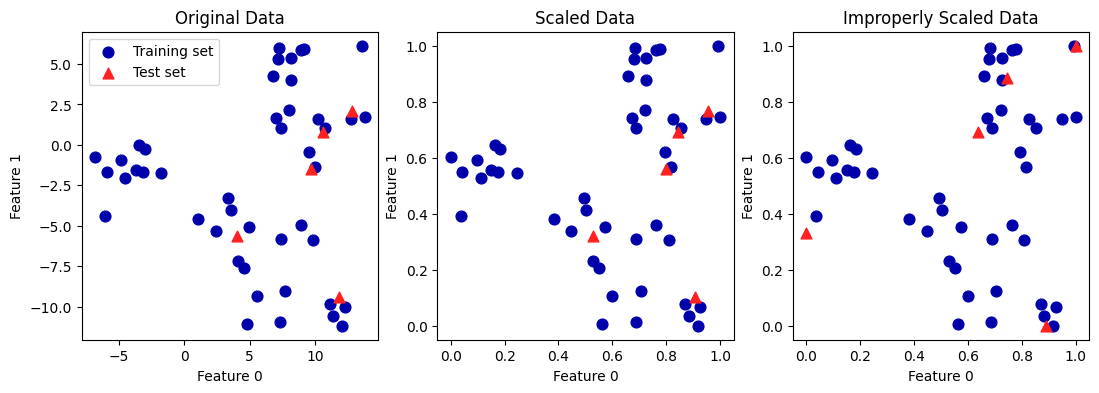

In [112]:
 from sklearn.datasets import make_blobs

 # make synthetic data (构造数据)
 X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

 # split it into training and test sets
 X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

 # plot the training and test sets
 fig, axes = plt.subplots(1, 3, figsize=(13, 4))
 axes[0].scatter(X_train[:, 0], X_train[:, 1],
 c=mglearn.cm2(0), label="Training set", s=60)
 axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
 c=mglearn.cm2(1), label="Test set", s=60)
 axes[0].legend(loc='upper left')
 axes[0].set_title("Original Data")
 
 # scale the data using MinMaxScaler
 scaler = MinMaxScaler()
 scaler.fit(X_train)
 X_train_scaled = scaler.transform(X_train)
 X_test_scaled = scaler.transform(X_test)

 # visualize the properly scaled data
 axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
 c=mglearn.cm2(0), label="Training set", s=60)
 axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
 c=mglearn.cm2(1), label="Test set", s=60)
 axes[1].set_title("Scaled Data")

 # rescale the test set separately（单独对测试集进行缩放）
 # so test set min is 0 and test set max is 1
 # DO NOT DO THIS! For illustration purposes only.
 test_scaler = MinMaxScaler()
 test_scaler.fit(X_test)
 X_test_scaled_badly = test_scaler.transform(X_test)

 # visualize wrongly scaled data
 axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
 c=mglearn.cm2(0), label="training set", s=60)
 axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
 marker='^', c=mglearn.cm2(1), label="test set", s=60)
 axes[2].set_title("Improperly Scaled Data")
 for ax in axes:
     ax.set_xlabel("Feature 0")
     ax.set_ylabel("Feature 1")

图3-2：对左图中的训练数据和测试数据同时缩放的效果（中）和分别缩放的效果（右）

**The first panel** is an unscaled two-dimensional dataset

**The second panel** is the same data, butscaled using the MinMaxScaler. Here, we called fit on the training set, and then
 called transform on the training and test sets. 
     
You can see that the dataset in the second panel looks identical to the first; only the ticks on the axes have changed. Now all
 the features are between 0 and 1. 
    
You can also see that the minimum and maximumfeature values
for the test data (the triangles) are not 0 and 1

**The third panel** shows what would happen if we scaled the training set and test set
 separately. In this case, the minimum and maximum feature values for both the train
ing and the test set are 0 and 1. 

But now the dataset looks different. The test points moved incongruously to the training set, as they were scaled differently. We changed
 the arrangement of the data in an arbitrary way. 
     
Clearly this is not what we want to do.

### Shortcuts and Efficient Alternatives
 Often, you want to fit a model on some dataset, and then transform it. This is a very
 common task, which can often be computed more efficiently than by simply calling
 fit and then transform. For this use case, all models that have a transform method
 also have a fit_transform method. Here is an example using StandardScaler:
 
```python
 from sklearn.preprocessing import StandardScaler
 scaler = StandardScaler()
 # calling fit and transform in sequence (using method chaining)
 X_scaled = scaler.fit(X).transform(X)
 # same result, but more efficient computation
 X_scaled_d = scaler.fit_transform(X)
```
While fit_transform is not necessarily more efficient for all models, it is still good
 practice to use this method when trying to transform the training set.

## The Effect of Preprocessing on Supervised Learning
 Now let’s go back to the cancer dataset and see the effect of using the MinMaxScaler
 on learning the SVC (this is a different way of doing the same scaling we did in Chap
ter 2). 

First, let’s fit the SVC on the original data again for comparison:

In [113]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
 random_state=0)
svm = SVC(C=100,kernel='rbf') # default is rbf
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.94


 Now, let’s scale the data using MinMaxScaler before fitting the SVC:

In [114]:
 # preprocessing using 0-1 scaling
 scaler = MinMaxScaler()
 scaler.fit(X_train)
 X_train_scaled = scaler.transform(X_train)
 X_test_scaled = scaler.transform(X_test)

 # learning an SVM on the scaled training data
 svm.fit(X_train_scaled, y_train)

 # scoring on the scaled test set
 print("Scaled test set accuracy: {:.2f}".format(
 svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


As we saw before, the effect of scaling the data is quite significant.

Even though scal
ing the data doesn’t involve any complicated math, it is good practice to use the scal
ing mechanisms provided by scikit-learn instead of reimplementing them yourself,
 as it’s easy to make mistakes even in these simple computations.

You can also easily **replace one preprocessing algorithm with anothe**r by changing the
 class you use, as all of the preprocessing classes **have the same interface**m, consisting of
 the fit and transform methods:

As we saw before, the effect of scaling the data is quite significant.

(我也不知道为什么不能reproduce书上的0.63)

Even though scaling the data doesn’t involve any complicated math, it is good practice to use the scaling mechanisms provided by scikit-learn instead of reimplementing them yourself,
 as it’s easy to make mistakes even in these simple computations.

You can also easily **replace one preprocessing algorithm with anothe**r by changing the
 class you use, as all of the preprocessing classes **have the same interface**m, consisting of
 the fit and transform methods:

In [115]:
 # preprocessing using zero mean and unit variance scaling
 from sklearn.preprocessing import StandardScaler
 scaler = StandardScaler()
 scaler.fit(X_train)
 X_train_scaled = scaler.transform(X_train)
 X_test_scaled = scaler.transform(X_test)

 # learning an SVM on the scaled training data
 svm.fit(X_train_scaled, y_train)
 
 # scoring on the scaled test set
 print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


Now that we’ve seen how simple data transformations for preprocessing work, let’s
 move on to more interesting transformations using unsupervised learning.

#  Dimensionality Reduction, Feature Extraction, and Manifold Learning

As we discussed earlier, transforming data using unsupervised learning can have
many motivations. 

The most common motivations are **visualization**, compressing the data, and finding a representation that is more informative for further processing.
 
One of the simplest and most widely used algorithms for all of these is **principal component analysis**. 

We’ll also look at two other algorithms: **non-negative matrix factori
zation (NMF)**, which is commonly used for feature extraction, 

and **t-SNE**, which is commonly used for visualization using two-dimensional scatter plots.

## PCA
 Principal component analysis is a method that rotates the dataset in a way such that
 the rotated features are statistically uncorrelated. 
 
 This rotation is often followed by selecting only a subset of the new features, according to how important they are for
 explaining the data. 
 
 The following example (Figure 3-3) illustrates the effect of PCA
 on a synthetic two-dimensional dataset:

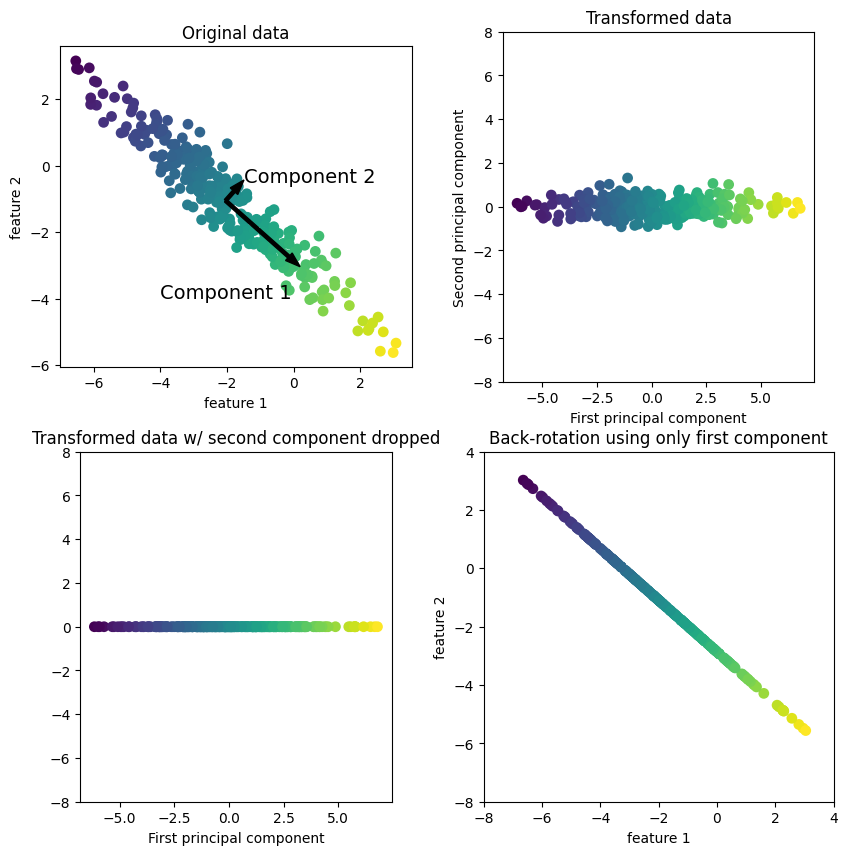

In [116]:
mglearn.plots.plot_pca_illustration()

##  How PCA Transforms Data

🖼️ Panel 1: Original Data (Top Left)

> 🔹 Shows raw 2D data points — colored to distinguish clusters or patterns.

➡️ PCA starts here — it looks at how features vary together.

 💡 Key Idea:

- PCA finds the **direction of maximum variance** → called **“Component 1”**.
- This is the line along which data spreads out the most — meaning it holds the most information.
- Then it finds the **second direction**, orthogonal(正交) (at 90°) to the first → **“Component 2”**.

> ✅ These directions are called **principal components** — they’re the main “axes” of variation in your data.

---
### Rotation

Aligns components with axes → simplifies interpretation


 🖼️ Panel 2: Rotated & Centered Data (Top Right)

> 🔹 The same data, now rotated so:
> 
> - Component 1 aligns with the **x-axis**
> - Component 2 aligns with the **y-axis**

Before rotation, PCA subtracts the **mean** from all data → centers it around zero.

💡 Why?

- Makes math easier
- Removes bias
- Ensures new axes are uncorrelated → correlation matrix becomes diagonal (only diagonal values ≠ 0)
- （也就是说，对于这种数据表示，
除了对角线，相关矩阵全部为零。）

➡️ This means: **The two principal components are independent** — no redundancy!

---

### Dimensionality Reduction

Keep only top components → reduce features while preserving info


 🖼️ Panel 3: Keep Only First Component (Bottom Left)

> 🔹 We drop Component 2 → keep only Component 1 → reduces data from 2D to 1D.

This is **dimensionality reduction**!

💡 ***Important Note:***

- We’re NOT keeping one original feature — we’re keeping the **most informative direction** found by PCA.
- In this case, that’s the diagonal line from top-left to bottom-right in Panel 1.

✅ So instead of losing info by dropping a feature, we keep the *most important pattern* in the data.

---

### Back-Rotation

Projects simplified data back into original space → helps visualization


 🖼️ Panel 4: Back-Rotation (Bottom Right)

> 🔹 We rotate the 1D data back into the original feature space — and add the mean back.

Now you see:

- Points lie along the **first principal component line** in the original coordinate system.
- **All other variation (noise, less important patterns) is removed**.

 💡 Why Do This?

- To visualize what part of the original data was preserved.
- Useful for **denoising** or understanding which features contribute most to variation.

## Applying PCA to the cancer dataset for visualization
One of the most common applications of PCA is ***visualizing high-dimensional data
sets***.

As we saw in Chapter 1, it is hard to create **scatter plots**(散点图) of data that has more
 than two features. 
 
 For the Iris dataset, we were able to create a pair plot (Figure 1-3 in
 Chapter 1) that gave us a partial picture of the data by showing us all the possible
 combinations of two features. 
 
 But if we want to look at the Breast Cancer dataset,
 even using a pair plot is tricky. 
 
 This dataset has 30 features, which would result in
 30 * 14 = 420 scatter plots! We’d never be able to look at all these plots in detail, let
 alone try to understand them.
 
 There is an even simpler visualization we can use, though—computing ***histograms***(直方图) of
 each of the features for the two classes, benign and malignant cancer (Figure 3-4):

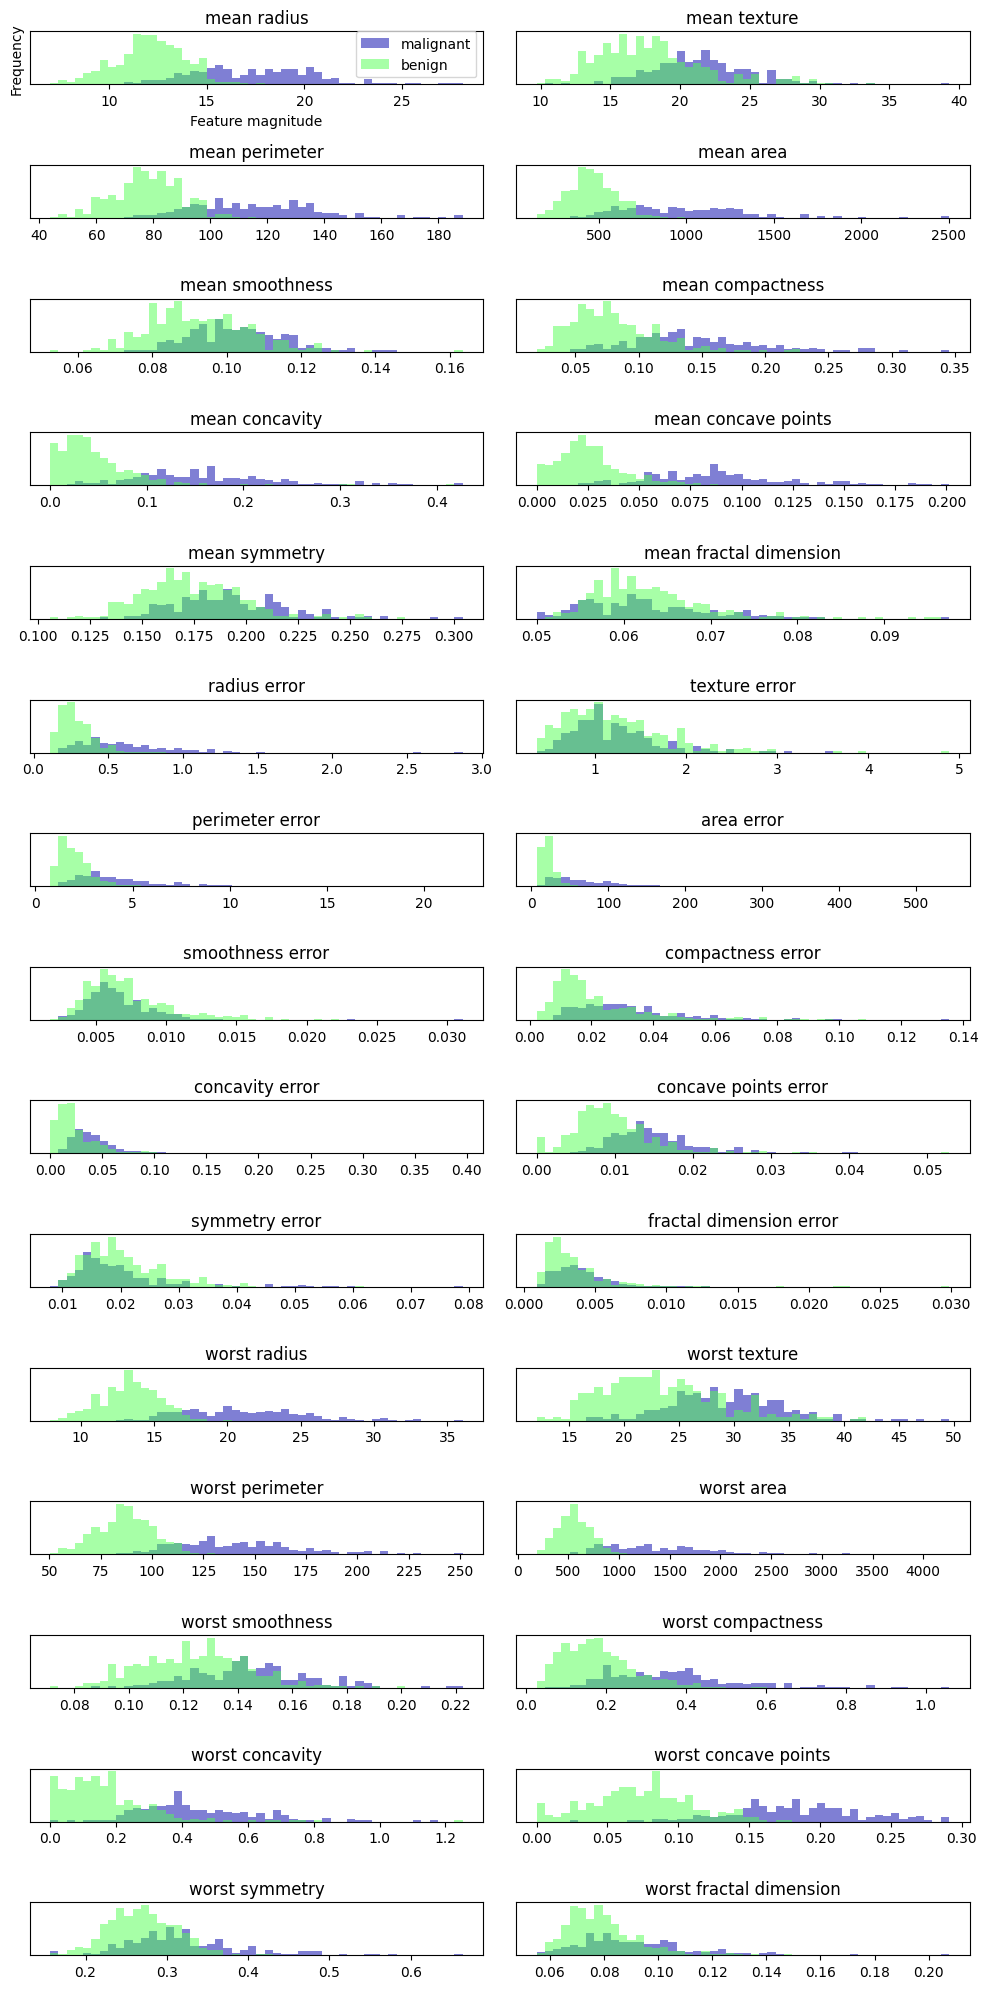

In [117]:
 fig, axes = plt.subplots(15, 2, figsize=(10, 20))
 malignant = cancer.data[cancer.target == 0]
 benign = cancer.data[cancer.target == 1]
 ax = axes.ravel()
 for i in range(30):
  _, bins = np.histogram(cancer.data[:, i], bins=50)
  ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
  ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
  ax[i].set_title(cancer.feature_names[i])
  ax[i].set_yticks(())
 ax[0].set_xlabel("Feature magnitude")
 ax[0].set_ylabel("Frequency")
 ax[0].legend(["malignant", "benign"], loc="best")
 fig.tight_layout()

### scale the data
Before we apply PCA, we scale our data so that each feature has unit variance using
 StandardScaler:

In [118]:
 from sklearn.datasets import load_breast_cancer
 cancer = load_breast_cancer()
 scaler = StandardScaler()
 scaler.fit(cancer.data)
 X_scaled = scaler.transform(cancer.data)

### instantiate and transform
We instantiate the PCA object, find the principal components
 by calling the fit method, and then apply the rotation and dimensionality reduction
 by calling transform. 
 
 By default, PCA only rotates (and shifts) the data, but keeps all
 principal components. 
 
 To reduce the dimensionality of the data, we need to specify
 how many components we want to keep when creating the PCA object:

In [119]:
 from sklearn.decomposition import PCA
 # keep the first two principal components of the data
 pca = PCA(n_components=2)
 # fit PCA model to breast cancer data
 pca.fit(X_scaled)
 # transform data onto the first two principal components
 X_pca = pca.transform(X_scaled)
 print("Original shape: {}".format(str(X_scaled.shape)))
 print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


###  Two-dimensional scatter plot

Text(0, 0.5, 'Second principal component')

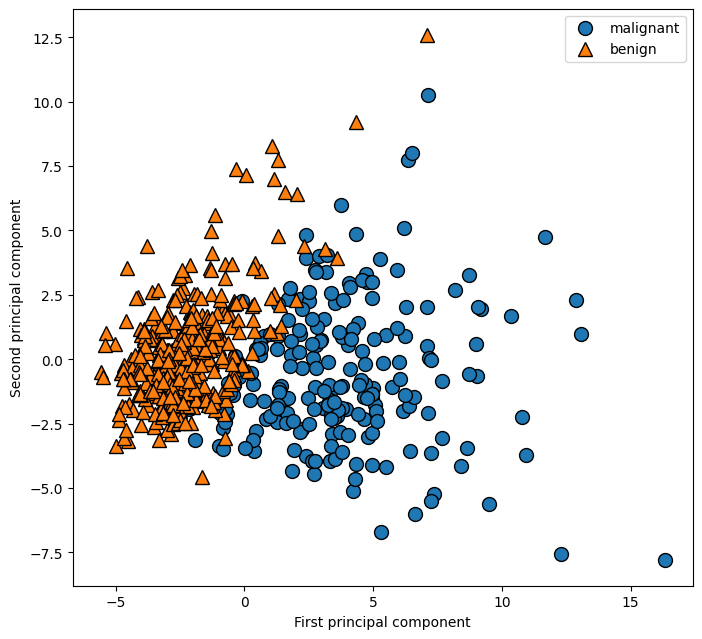

In [120]:
 # plot first vs. second principal component, colored by class
 plt.figure(figsize=(8, 8))
 mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
 plt.legend(cancer.target_names, loc="best")
 plt.gca().set_aspect("equal")
 plt.xlabel("First principal component")
 plt.ylabel("Second principal component")

It is important to note that PCA is an unsupervised method

 “PCA is unsupervised — it doesn’t use class labels when finding the rotation.”  
→ That means: PCA didn’t know which points were benign or malignant — it just looked at the **correlations** in the data.

But after PCA, we used the labels to color the points — that’s why we can see separation.

---------

***Why Is This Useful?***

Because now we can say:

> Even though PCA didn’t use class info, the two classes still separate well in 2D → so a simple linear classifier (like SVM or Logistic Regression) could probably do a good job here!

-------

***downside***

A downside of PCA is that ***the two axes in the plot are often not very easy to interpret***.
     
 The principal components correspond to directions in the original data, so they are
 combinations of the original features. 
     
However, these combinations are usually very complex, as we’ll see shortly. 


Why? Because each principal component is a **weighted combination** of many original features.

Example:

- PC1 might be: `0.2*radius + 0.1*texture - 0.3*perimeter + ...` → Not intuitive like “tumor size” or “color”

So while PCA helps visualize and simplify data, it doesn’t always give you clear, human-readable meanings.

---------------


     
**The principal components themselves are stored in the
 components_ attribute of the PCA object during fitting**:
     

In [121]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


In [122]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.2189  0.1037  0.2275  0.221   0.1426  0.2393  0.2584  0.2609  0.1382
   0.0644  0.206   0.0174  0.2113  0.2029  0.0145  0.1704  0.1536  0.1834
   0.0425  0.1026  0.228   0.1045  0.2366  0.2249  0.128   0.2101  0.2288
   0.2509  0.1229  0.1318]
 [-0.2339 -0.0597 -0.2152 -0.2311  0.1861  0.1519  0.0602 -0.0348  0.1903
   0.3666 -0.1056  0.09   -0.0895 -0.1523  0.2044  0.2327  0.1972  0.1303
   0.1838  0.2801 -0.2199 -0.0455 -0.1999 -0.2194  0.1723  0.1436  0.098
  -0.0083  0.1419  0.2753]]


### Heat map of the first two principal components 
 We can also visualize the coefficients using a heat map (Figure 3-6), which might be
 easier to understand:

Text(0, 0.5, 'Principal components')

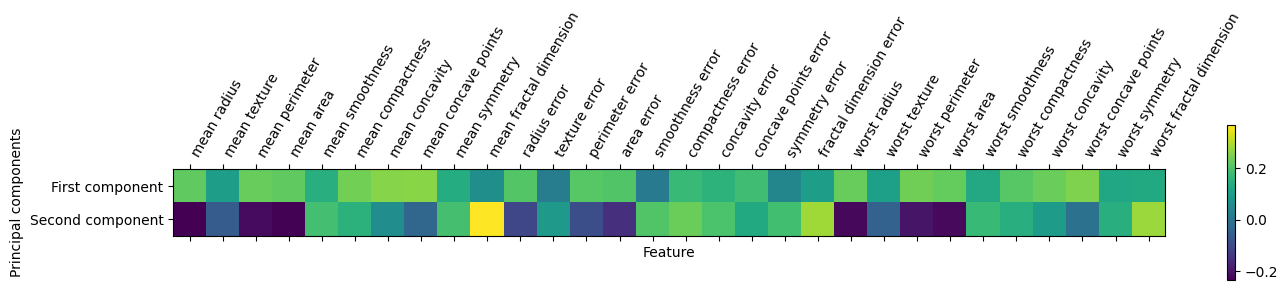

In [123]:
 plt.matshow(pca.components_, cmap='viridis')
 plt.yticks([0, 1], ["First component", "Second component"])
 plt.colorbar()
 plt.xticks(range(len(cancer.feature_names)),
 cancer.feature_names, rotation=60, ha='left')
 plt.xlabel("Feature")
 plt.ylabel("Principal components")

***Explaination***

***PC1***

All squares are **greenish-yellow**, meaning:

> All features have **positive values** in the first PC.

But wait — the text says:

> “In the first component, all features have the same sign (it’s negative...)”

Wait… what? Green = positive, but text says “negative”?

📌 Here’s the key:

> The **sign doesn’t matter** in PCA!  
> Because if you flip the direction of a PC (multiply by -1), it still captures the same variance.

So even though the plot shows green (positive), the actual numbers might be negative — but since we care about *magnitude* and *relative importance*, not direction, it’s okay.

✅ What matters:

> All features move together → when one is high, others tend to be high too → strong correlation!

This is why the text says:

> “There is a general correlation between all features.”

---------

***PC2***

Here you see mixed signs: some green (positive), some purple (negative).

That means:

Some features contribute positively to PC2, others negatively. 

This is called “mixing” — ***PC2 is trying to capture differences between features***.

--------

***PCA creates two “super sensors”***:

🎯 First Super Sensor (PC1):

> “Overall Size & Density” — all measurements go up together → green across the board.

🎯 Second Super Sensor (PC2):

> “Shape vs Texture” — some features go up, others go down → mixed colors.



## Feature Extraction

Think of it like this:

You have raw data → like 30 numbers per tumor → hard to understand
PCA turns them into 2 “super features” → easier to visualize and classify

> Feature extraction helps us reduce complexity while keeping the most important patterns.

###  the Labeled Faces
 We will give a very simple application of feature extraction on images using PCA, by
 working with face images from **the Labeled Faces** in the Wild dataset. 

 We use gray
scale versions of these images, and scale them down for faster processing. You can see
 some of the images in Figure 3-7:




##  the Labeled Faces 
 We will give a very simple application of feature extraction on images using PCA, by
 working with face images from **the Labeled Faces** in the Wild dataset. 

 We use gray
scale versions of these images, and scale them down for faster processing. You can see
 some of the images in Figure 3-7:

### 1. dataset shapes and class distribution

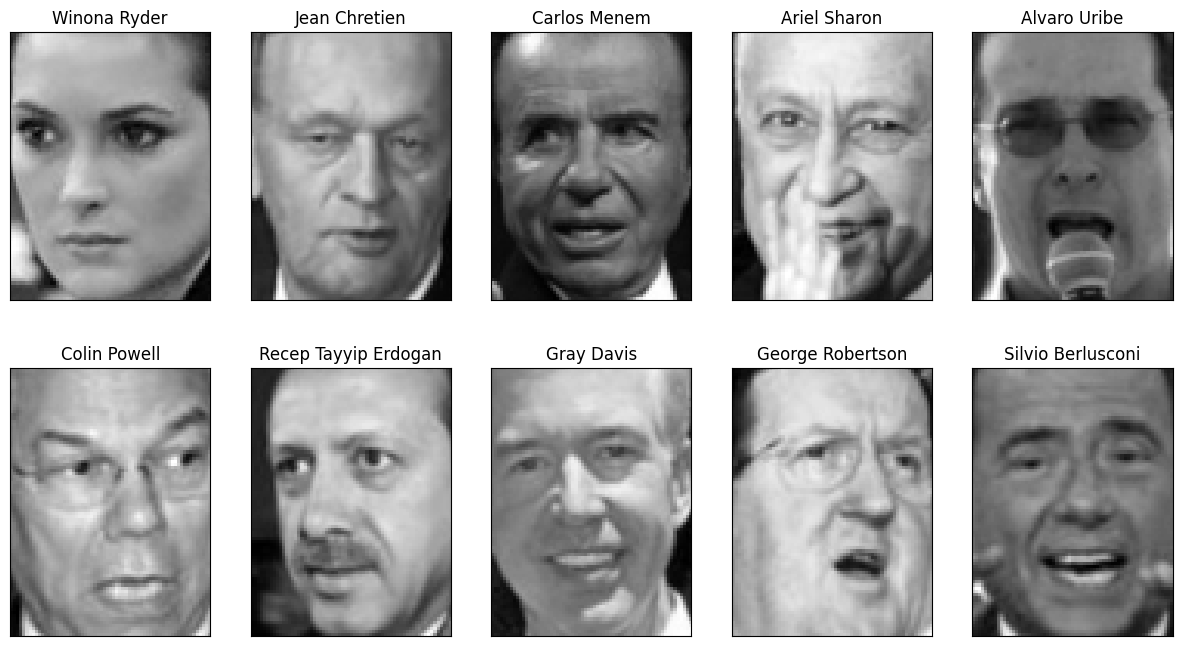

In [124]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [125]:
 print("people.images.shape: {}".format(people.images.shape))
 print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


***Explaination***

- You have **3023 face images**
- From **62 different people**
- Each image is **87×65 pixels** → total 5655 features per face (if flattened)

### 2.  Count How Many Images Per Person 

In [126]:
 # count how often each target appears
 counts = np.bincount(people.target)
 # print counts next to target names
 for i, (count, name) in enumerate(zip(counts, people.target_names)):
  print("{0:25} {1:3}".format(name, count), end='   ')
  if (i + 1) % 3 == 0:
   print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

✅ What It Does:

1. `np.bincount(people.target)` → counts how many times each class (person) appears  
	→ Returns an array: `[count_for_person_0, count_for_person_1, ...]`
2. `zip(counts, people.target_names)` → pairs each count with the person’s name
3. `enumerate(...)` → gives us index `i` (starting from 0)
4. `"{0:25} {1:3}"` → formats output:
	- `{0:25}` → person name, left-aligned in 25 characters
	- `{1:3}` → count, right-aligned in 3 characters
5. `end=' '` → don’t go to new line after each print
6. `if (i + 1) % 3 == 0: print()` → after every 3 people, go to new line → makes it readable!

---------

🎯 Why do this?

> To see if the dataset is **balanced** or **skewed**.

Here, some people have only 20–25 images, others may have more → but not extremely unbalanced.

### 3. **Make Data Less Skewed**

To make the data less skewed, we will only take up to 50 images of each person” :

This is a smart preprocessing trick — because if one person has 1000 images and another has 20, the model might just learn to recognize the popular person better.

So we limit each person to at most 50 images.

In [127]:
 mask = np.zeros(people.target.shape, dtype=np.bool)
 for target in np.unique(people.target):
  mask[np.where(people.target == target)[0][:50]] = 1
 X_people = people.data[mask]
 y_people = people.target[mask]
 # scale the grayscale values to be between 0 and 1
 # instead of 0 and 255 for better numeric stability
 X_people = X_people / 255.

X_people = X_people / 255.

→ Normalize pixel values from 0–255 to 0–1 → better for numerical stability in ML models

💡 Why normalize?

Because algorithms like KNN, SVM, Logistic Regression work better when features are on similar scales.

### ***The problems of face congnition***

✅ What’s the Problem?

> In face recognition, we often want to answer:  
> **“Does this new face belong to someone we already know?”**

Example applications:

- Photo collection (e.g., Google Photos)
- Social media (tagging friends)
- Security systems (unlock phone with face)

---

❗ The Challenge:

1. **Many people, few images per person**  
	→ Usually only 1–5 photos per person in database  
	→ Not enough data to train complex models like SVM or Neural Networks
2. **Need to add new people easily**  
	→ You don’t want to retrain the whole model every time you add a new person!



### 4. **Train a Simple Classifie**


“A simple solution is to use a one-nearest-neighbor classifier that looks for the most similar face image to the face you are classifying.” 

 This classifier could in principle
 work with only a single training example per class. 
 
 Let’s take a look at how well ***KNeighborsClassifier*** does here:

 Let’s take a look at how well
 KNeighborsClassifier does here:

In [128]:
 from sklearn.neighbors import KNeighborsClassifier
 # split the data into training and test sets
 X_train, X_test, y_train, y_test = train_test_split(
  X_people, y_people, stratify=y_people, random_state=0)
 # build a KNeighborsClassifier using one neighbor
 knn = KNeighborsClassifier(n_neighbors=1)
 knn.fit(X_train, y_train)
 print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.22


So 22% is better than random — but still not great.

Why? Because:

### Comparing Faces Using Raw Pixels Is Not Smart

“Computing distances in the original pixel space is quite a bad way to measure similarity between faces.” 

🎯 Why?

Because:

1. **Humans don’t see faces pixel-by-pixel**  
	→ We look at features: eyes, nose, mouth, shape — not individual brightness values.

2. **Small shifts cause big changes**  

3. **Pixel-based comparison ignores structure**  
	→ Two faces with same expression but different lighting → very different pixel values → treated as unrelated


---------

### Problem: Solution: Use PCA to Transform the Data First!

✅ Idea:

- Instead of comparing raw pixels → compare **PCA-transformed features**
- PCA finds directions (components) that capture the most important facial patterns
- Distances in PCA space are more meaningful → less sensitive to small shifts or lighting changes

Also:

> “We enable the whitening option of PCA, which rescales the principal components to have the same scale.”  
> → Like `StandardScaler` after PCA → makes all PCs equally important

（the whitening 白化）

这里我们启用PCA的白化（whitening）选项，它将主成分缩放到相同的尺
度。变换后的结果与使用StandardScaler相同。再次使用图3-3中的数据，白化不仅对应
于旋转数据，还对应于缩放数据使其形状是圆形而不是椭圆（参见图3-8）：


***Transformation of data with PCA using whitening***

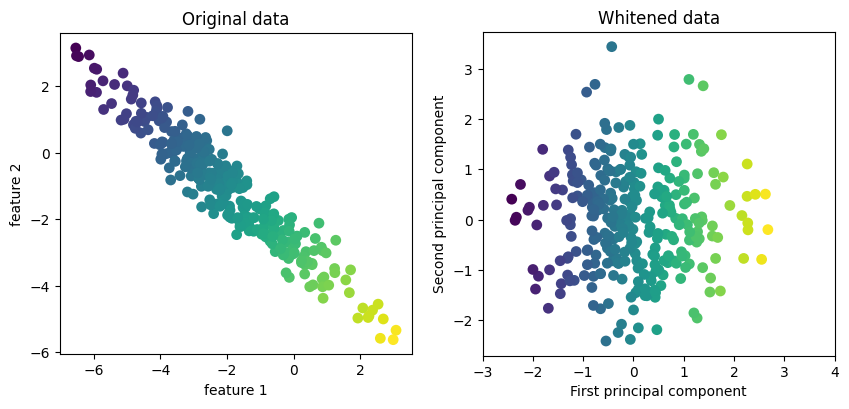

In [129]:
mglearn.plots.plot_pca_whitening()

### Apply PCA to training data
 We fit the PCA object to the training data and extract the first 100 principal components. Then we transform the training and test data:

In [130]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


###  Train KNN on PCA Features
 The new data has 100 features, the first 100 principal components.
 
 Now, we can use
 the new representation to classify our images using a one-nearest-neighbors classifier:

In [131]:
 knn = KNeighborsClassifier(n_neighbors=1)
 knn.fit(X_train_pca, y_train)
 print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.30


Our accuracy improved quite significantly, from 26.6% to 35.7%, confirming our
 intuition that the principal components might provide a better representation of the
 data.

💬 Why Did This Happen?
Because:

Raw pixels are sensitive to small shifts → bad for KNN
PCA finds directions that capture the most variation → more robust
Whitening makes all components equally important → helps distance-based models like KNN
✅ So:

PCA didn’t just reduce dimensions — it created a better representation of faces. 


     

In [132]:
 print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


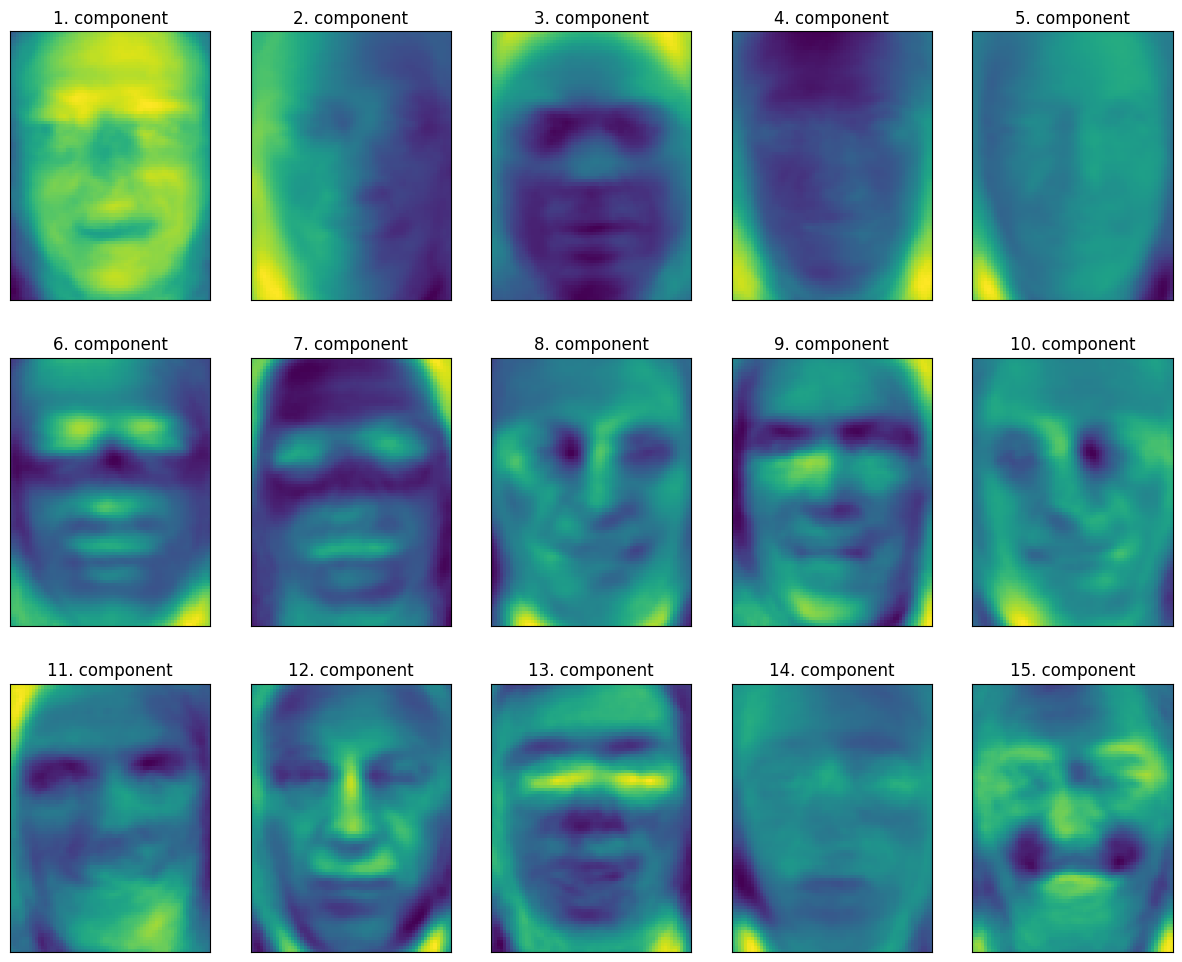

In [133]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

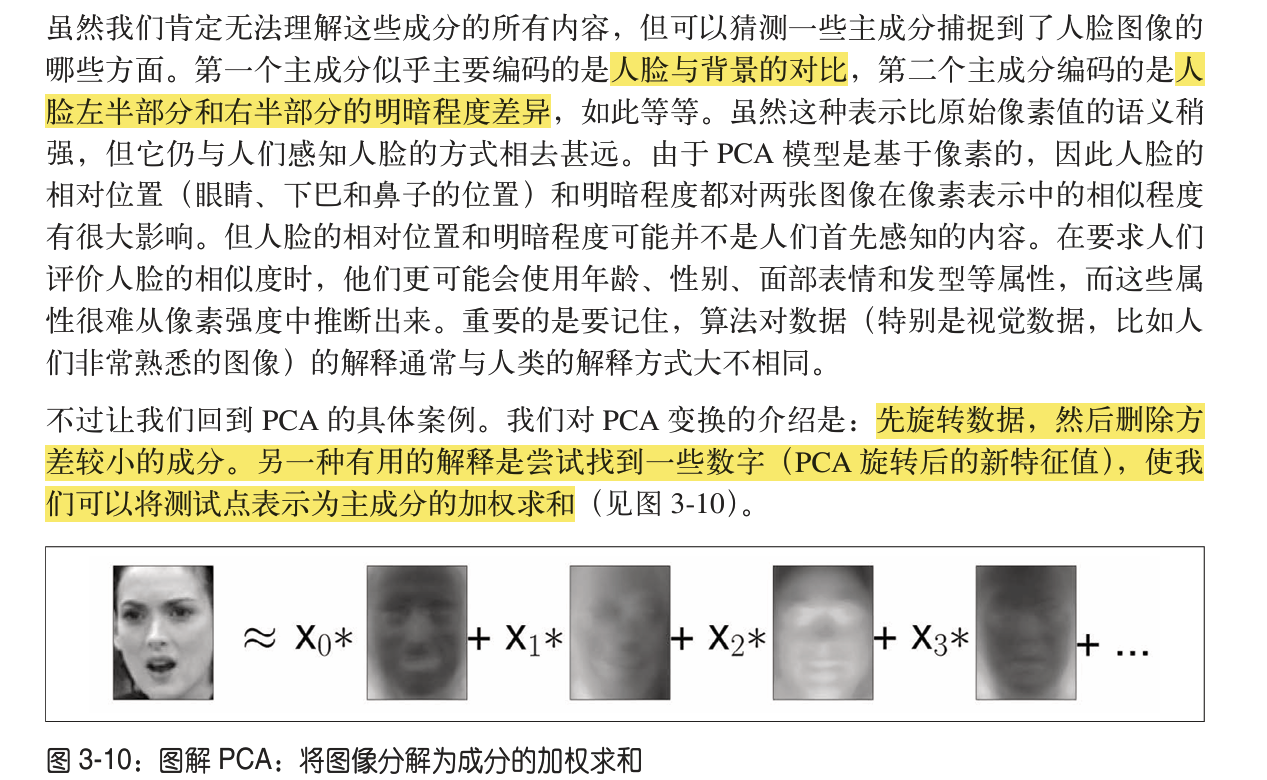

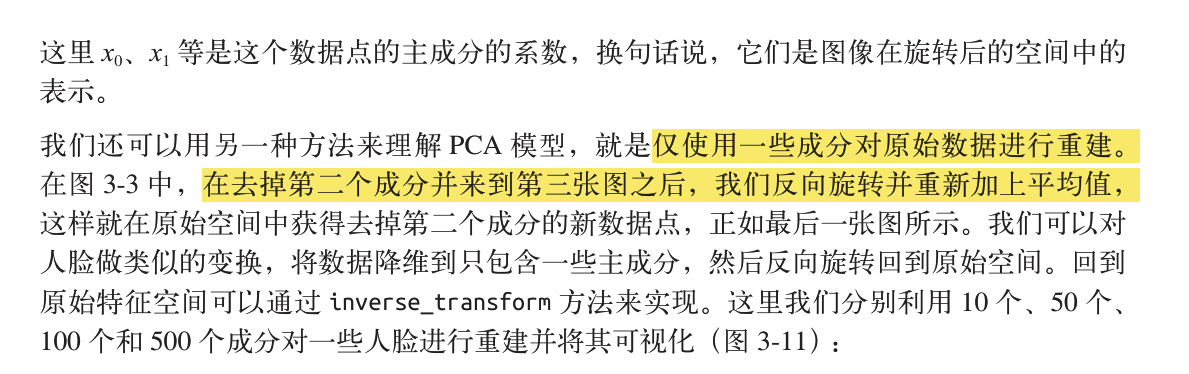




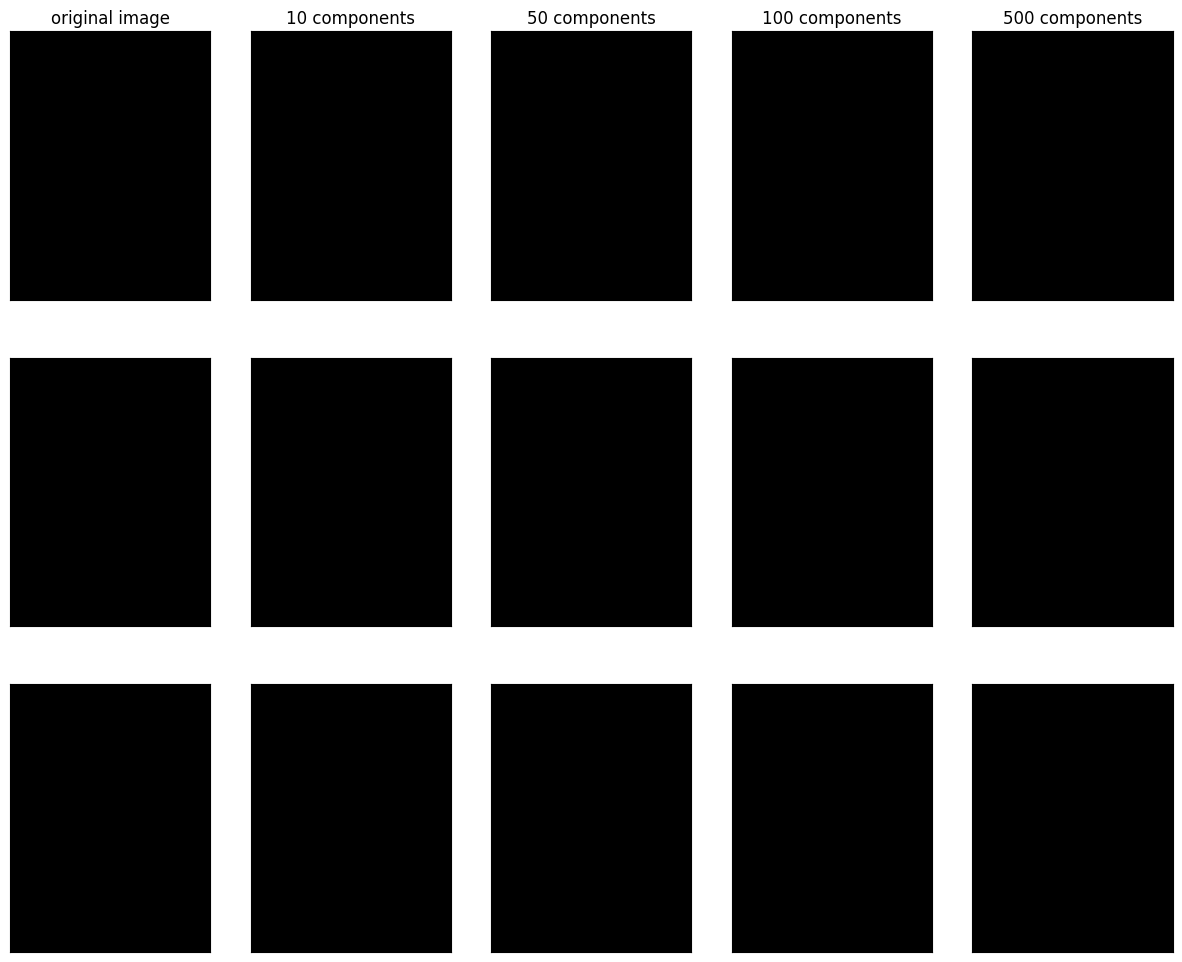

In [141]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

可以看到，在仅使用前10个主成分时，仅捕捉到了图片的基本特点，比如人脸方向和明
暗程度。随着使用的主成分越来越多，图像中也保留了越来越多的细节。这对应于图3-10
的求和中包含越来越多的项。如果使用的成分个数与像素个数相等，意味着我们在旋转后
不会丢弃任何信息，可以完美重建图像。

我们还可以尝试使用PCA的前两个主成分，将数据集中的所有人脸在散点图中可视化
（图3-12），其类别在图中给出。这与我们对cancer数据集所做的类似：

Text(0, 0.5, 'Second principal component')

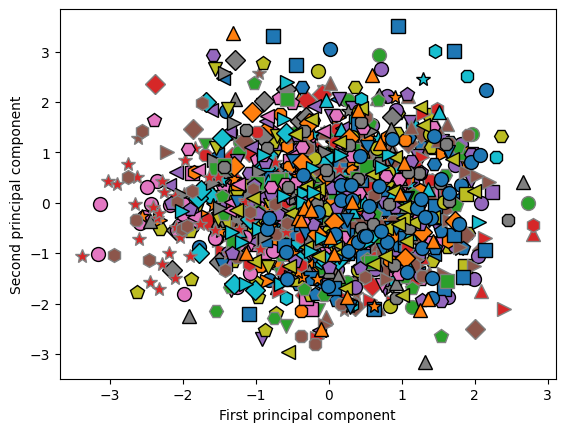

In [142]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train) 
plt.xlabel("First principal component") 
plt.ylabel("Second principal component") 